In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving stud.csv to stud.csv
{'stud.csv': b'"gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course","math_score","reading_score","writing_score"\n"female","group B","bachelor\'s degree","standard","none","72","72","74"\n"female","group C","some college","standard","completed","69","90","88"\n"female","group B","master\'s degree","standard","none","90","95","93"\n"male","group A","associate\'s degree","free/reduced","none","47","57","44"\n"male","group C","some college","standard","none","76","78","75"\n"female","group B","associate\'s degree","standard","none","71","83","78"\n"female","group B","some college","standard","completed","88","95","92"\n"male","group B","some college","free/reduced","none","40","43","39"\n"male","group D","high school","free/reduced","completed","64","64","67"\n"female","group B","high school","free/reduced","none","38","60","50"\n"male","group C","associate\'s degree","standard","none","58","54","52"\n"male","group D","assoc

In [ ]:
df=pd.read_csv('/content/stud.csv')

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:

# prepare indepedent and dependent features
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [ ]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
y.head()

,math_score
0,72
1,69
2,90
3,47
4,76


In [ ]:
# create column transformer with three types of the transformer
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
one_hot_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',one_hot_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
X.shape


(1000, 19)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

# create evaluation function to get all metrics after the model training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [ ]:
models={
    'linear regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(),
    'Ada boost regressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # train the model
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate the train and test data set
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

linear regression
Model performance for training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- R2 Score: 0.8743
----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- Mean Squared Error: 29.0952
- R2 Score: 0.8804


Lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- R2

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,linear regression,0.880433
8,Ada boost regressor,0.852782
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849001
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.782192
4,Decision Tree,0.736540


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['R2_Score'].plot(kind='hist', bins=20, title='R2_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='R2_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['R2_Score'].plot(kind='line', figsize=(8, 4), title='R2_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Linear regresson

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 88.04


# plot y_pred and y_test

Text(0, 0.5, 'predicted')

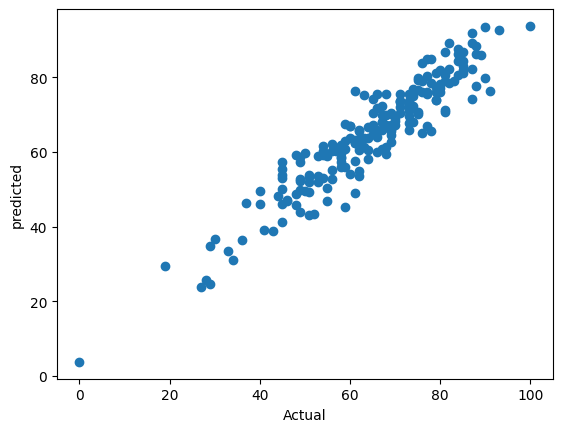

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')


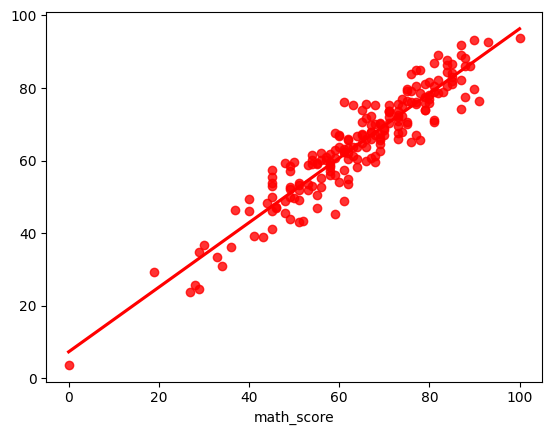

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.show()

# difference between the actual and predicted value

In [ ]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'difference':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual value,predicted value,difference,Difference
521,91,76.387970,76.387970,14.612030
737,53,58.885970,58.885970,-5.885970
740,80,76.990265,76.990265,3.009735
660,74,76.851804,76.851804,-2.851804
411,84,87.627378,87.627378,-3.627378
...,...,...,...,...
408,52,43.409149,43.409149,8.590851
332,62,62.152214,62.152214,-0.152214
208,74,67.888395,67.888395,6.111605
613,65,67.022287,67.022287,-2.022287


In [ ]:
# Maximum positive difference (underestimation)
max_positive_diff = pred_df['Difference'].max()
max_positive_row = pred_df.loc[pred_df['Difference'].idxmax()]

# Maximum negative difference (overestimation)
max_negative_diff = pred_df['Difference'].min()
max_negative_row = pred_df.loc[pred_df['Difference'].idxmin()]

print(f"Maximum positive difference: {max_positive_diff}")
print(max_positive_row)
print(f"Maximum negative difference: {max_negative_diff}")
print(max_negative_row)

Maximum positive difference: 14.612030295292314
Actual value       91.00000
predicted value    76.38797
difference         76.38797
Difference         14.61203
Name: 521, dtype: float64
Maximum negative difference: -15.255711098581287
Actual value       61.000000
predicted value    76.255711
difference         76.255711
Difference        -15.255711
Name: 158, dtype: float64
